In [3]:
from PIL import Image
import imagehash
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
meta_df = pd.read_csv('meta_train.csv')
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB


In [5]:
# Check for duplicates in the image_id column
meta_df[meta_df['image_id'].duplicated()]

,image_id,label,variety,age


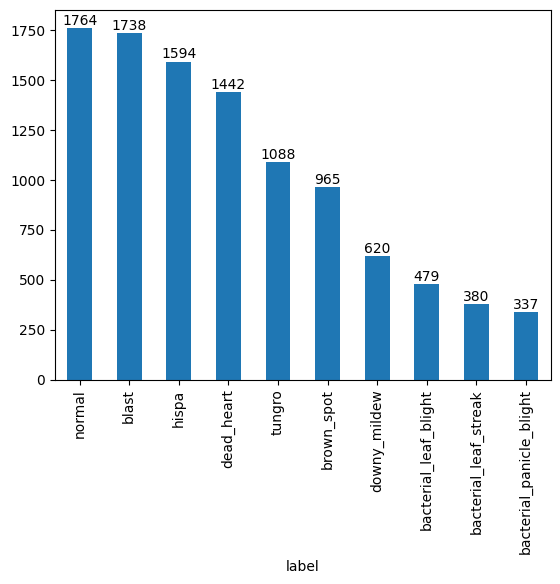

In [6]:
counts = meta_df['label'].value_counts()
ax = counts.plot(kind='bar')

for i, count in enumerate(counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

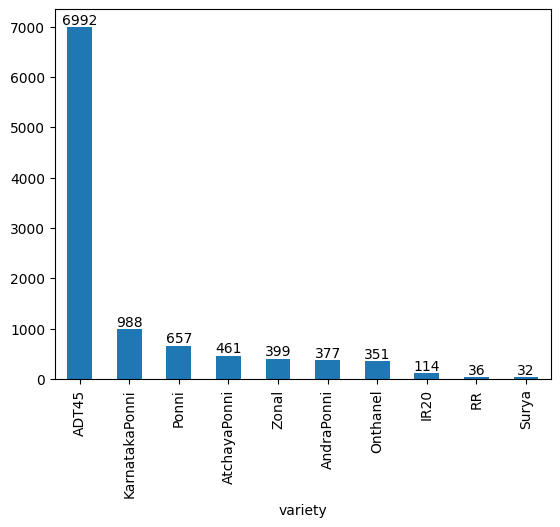

In [7]:
counts = meta_df['variety'].value_counts()
ax = counts.plot(kind='bar')

for i, count in enumerate(counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

In [8]:
image_data = []
train_images_path = 'train_images'
disease_classes = meta_df['label'].unique()

for disease in disease_classes:
  for filename in os.listdir(os.path.join(train_images_path, disease)):
    with Image.open(os.path.join(train_images_path, disease, filename)) as img:
      image_data.append({
        'Filename': filename, 
        'Hash': imagehash.phash(img),
        'Image Path': os.path.join(train_images_path, disease, filename),
        'File Type': img.format,
        'Width': img.size[0],
        'Height': img.size[1],
        'Mode': img.mode,
        'Transparency': (img.mode in ('RGBA', 'RGBa', 'LA', 'La', 'PA')) or (img.mode == 'P' and 'transparency' in img.info),
        'Disease': disease,
      })

image_df = pd.DataFrame(image_data)
image_df.head()

,Filename,Hash,Image Path,File Type,Width,Height,Mode,Transparency,Disease
0,108526.jpg,ccf213ad32f52b82,train_images/bacterial_leaf_blight/108526.jpg,JPEG,480,640,RGB,False,bacterial_leaf_blight
1,101516.jpg,948e72e439dff401,train_images/bacterial_leaf_blight/101516.jpg,JPEG,480,640,RGB,False,bacterial_leaf_blight
2,106292.jpg,df9388c03e370ec9,train_images/bacterial_leaf_blight/106292.jpg,JPEG,480,640,RGB,False,bacterial_leaf_blight
3,110382.jpg,ccb291ff129b6883,train_images/bacterial_leaf_blight/110382.jpg,JPEG,480,640,RGB,False,bacterial_leaf_blight
4,108056.jpg,c9b532c9a4d69393,train_images/bacterial_leaf_blight/108056.jpg,JPEG,480,640,RGB,False,bacterial_leaf_blight


In [9]:
image_df['File Type'].value_counts()

File Type
JPEG    10407
Name: count, dtype: int64

In [10]:
image_df['Mode'].value_counts()

Mode
RGB    10407
Name: count, dtype: int64

In [11]:
image_df['Transparency'].value_counts()

Transparency
False    10407
Name: count, dtype: int64

In [12]:
image_df.groupby(['Width', 'Height']).size()

Width  Height
480    640       10403
640    480           4
dtype: int64

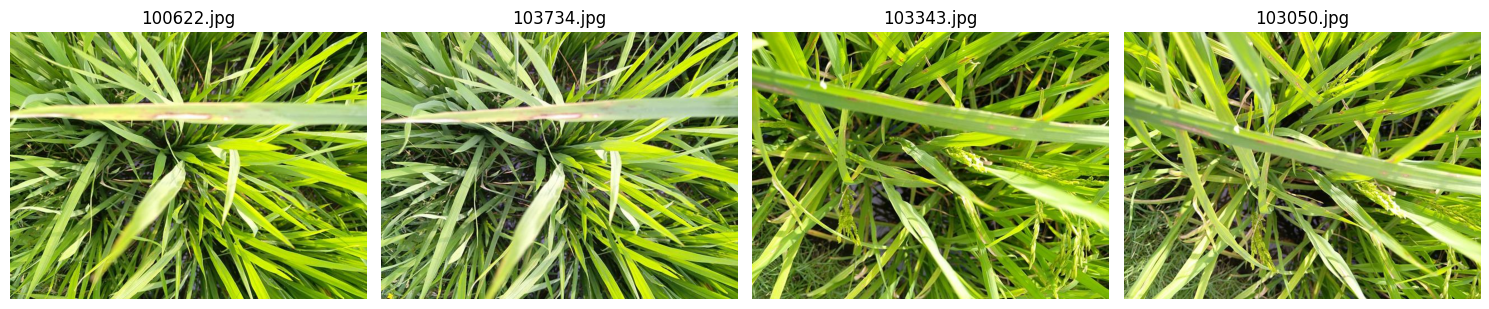

In [13]:
filtered_images = image_df[(image_df['Width'] == 640) & (image_df['Height'] == 480)]

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for ax, (_, row) in zip(axes, filtered_images.iterrows()):
  img = Image.open(row['Image Path'])
  ax.imshow(img)
  ax.set_title(row['Filename'])
  ax.axis('off')

plt.tight_layout()
plt.show()

In [14]:
duplicate_hashes = image_df[image_df['Hash'].duplicated()]
duplicate_hashes

,Filename,Hash,Image Path,File Type,Width,Height,Mode,Transparency,Disease
128,104800.jpg,9c99e36458a7a978,train_images/bacterial_leaf_blight/104800.jpg,JPEG,480,640,RGB,False,bacterial_leaf_blight
227,108353.jpg,fb9ba048da1fe184,train_images/bacterial_leaf_blight/108353.jpg,JPEG,480,640,RGB,False,bacterial_leaf_blight
270,106562.jpg,b1cebc6a51a3c5a8,train_images/bacterial_leaf_blight/106562.jpg,JPEG,480,640,RGB,False,bacterial_leaf_blight
273,106984.jpg,ccb253ad72d50bd0,train_images/bacterial_leaf_blight/106984.jpg,JPEG,480,640,RGB,False,bacterial_leaf_blight
323,103032.jpg,f2cc1de74118b2e3,train_images/bacterial_leaf_blight/103032.jpg,JPEG,480,640,RGB,False,bacterial_leaf_blight
...,...,...,...,...,...,...,...,...,...
10323,101040.jpg,f0a7c0d70d5ebb04,train_images/tungro/101040.jpg,JPEG,480,640,RGB,False,tungro
10367,108310.jpg,9de217e17781501f,train_images/tungro/108310.jpg,JPEG,480,640,RGB,False,tungro
10377,103091.jpg,ea9108c79ab44bf6,train_images/tungro/103091.jpg,JPEG,480,640,RGB,False,tungro
10390,105231.jpg,f1814aa56a3cc67b,train_images/tungro/105231.jpg,JPEG,480,640,RGB,False,tungro


In [15]:
image_df['Filename'].duplicated().value_counts()

Filename
False    10407
Name: count, dtype: int64

In [16]:
meta_filename = set(meta_df['image_id'])
image_filename = set(image_df['Filename'])

missing_images = meta_filename - image_filename
print("Missing images:", missing_images)

missing_metadata = image_filename - meta_filename
print("Missing metadata:", missing_metadata)

Missing images: set()
Missing metadata: set()


In [17]:
merged_df = pd.merge(meta_df, image_df, left_on='image_id', right_on='Filename', how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_id      10407 non-null  object
 1   label         10407 non-null  object
 2   variety       10407 non-null  object
 3   age           10407 non-null  int64 
 4   Filename      10407 non-null  object
 5   Hash          10407 non-null  object
 6   Image Path    10407 non-null  object
 7   File Type     10407 non-null  object
 8   Width         10407 non-null  int64 
 9   Height        10407 non-null  int64 
 10  Mode          10407 non-null  object
 11  Transparency  10407 non-null  bool  
 12  Disease       10407 non-null  object
dtypes: bool(1), int64(3), object(9)
memory usage: 985.9+ KB


In [18]:
missedmatch = merged_df[merged_df['Disease'] != merged_df['label']]
missedmatch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_id      0 non-null      object
 1   label         0 non-null      object
 2   variety       0 non-null      object
 3   age           0 non-null      int64 
 4   Filename      0 non-null      object
 5   Hash          0 non-null      object
 6   Image Path    0 non-null      object
 7   File Type     0 non-null      object
 8   Width         0 non-null      int64 
 9   Height        0 non-null      int64 
 10  Mode          0 non-null      object
 11  Transparency  0 non-null      bool  
 12  Disease       0 non-null      object
dtypes: bool(1), int64(3), object(9)
memory usage: 0.0+ bytes


In [19]:
merged_df = merged_df.drop_duplicates(subset='Hash')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10203 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_id      10203 non-null  object
 1   label         10203 non-null  object
 2   variety       10203 non-null  object
 3   age           10203 non-null  int64 
 4   Filename      10203 non-null  object
 5   Hash          10203 non-null  object
 6   Image Path    10203 non-null  object
 7   File Type     10203 non-null  object
 8   Width         10203 non-null  int64 
 9   Height        10203 non-null  int64 
 10  Mode          10203 non-null  object
 11  Transparency  10203 non-null  bool  
 12  Disease       10203 non-null  object
dtypes: bool(1), int64(3), object(9)
memory usage: 1.0+ MB


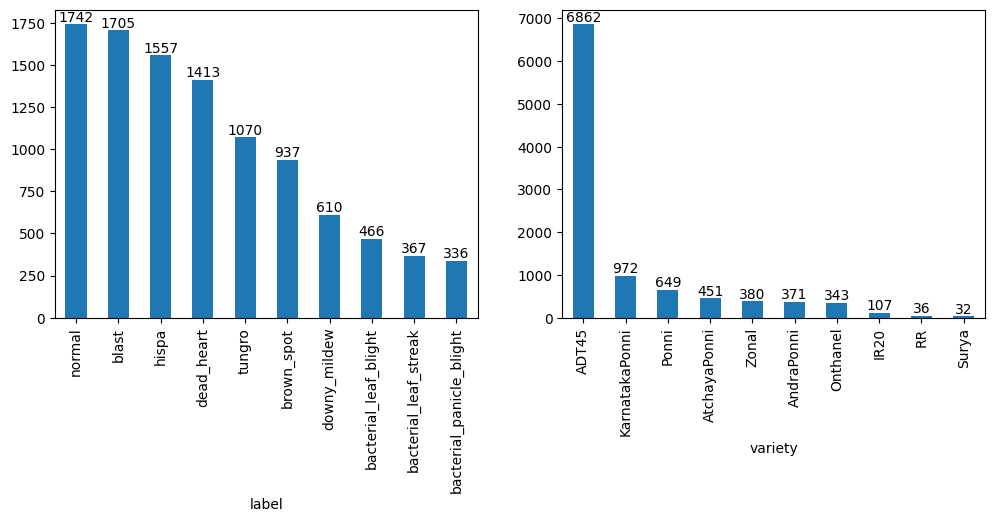

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

disease_variety_counts = merged_df['label'].value_counts()
ax_1 = disease_variety_counts.plot(kind='bar', ax=ax[0])

for i, count in enumerate(disease_variety_counts):
    ax_1.text(i, count + 0.5, str(count), ha='center', va='bottom')

rice_variety_counts = merged_df['variety'].value_counts()
ax_2 = rice_variety_counts.plot(kind='bar', ax=ax[1])

for i, count in enumerate(rice_variety_counts):
    ax_2.text(i, count + 0.5, str(count), ha='center', va='bottom')

In [118]:
from sklearn.model_selection import train_test_split

train_disease_df, val_disease_df = train_test_split(merged_df, test_size=0.2, stratify=merged_df['label'], random_state=42)
train_variety_df, val_variety_df = train_test_split(merged_df, test_size=0.2, stratify=merged_df['variety'], random_state=42)

In [113]:
train_disease_df['label'].value_counts().max()

1393

In [107]:
train_variety_records = []
MAX_LENGTH = 2000

for variety, sub in train_variety_df.groupby("variety"):
  class_length = len(sub)
  
  if class_length > MAX_LENGTH:        # Undersample for ADT45
    dup_plan = sub.sample(MAX_LENGTH, replace=False, random_state=42)
  
  else:                                # Oversample for other classes
    target_length = min(MAX_LENGTH, class_length * 10)
    dup_plan = sub.sample(target_length, replace=True, random_state=42)    
  
  train_variety_records.append(dup_plan)

train_variety_df = pd.concat(train_variety_records, ignore_index=True)

<Axes: xlabel='variety'>

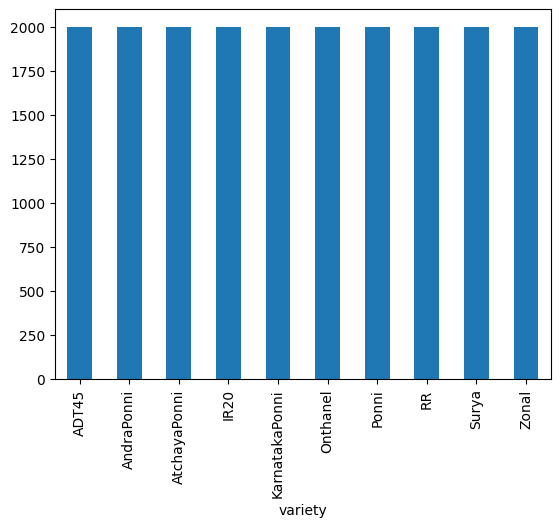

In [108]:
train_variety_df['variety'].value_counts().plot(kind='bar')

In [ ]:
import tensorflow as tf

augmenter = tf.keras.Sequential([
	tf.keras.layers.RandomFlip("horizontal"),
	tf.keras.layers.RandomRotation(0.2),
	tf.keras.layers.RandomZoom(0.1, 0.1),
	tf.keras.layers.RandomShear(x_factor=0.1, y_factor=0.1),
	tf.keras.layers.RandomBrightness(factor=0.2),
])

def load_and_preprocess(path, label):
	img = tf.io.read_file(path)
	img = tf.image.decode_jpeg(img, channels=3)

	shape = tf.shape(img)
	if shape[1] > shape[0]:
		img = tf.image.rot90(img, k=1)    

	img = augmenter(img)
	img = tf.image.random_crop(img, size=[int(640 * 0.9), int(480 * 0.9), 3])
	img = tf.image.resize(img, [256, 256])
											
	return img, label

variety_dataset = tf.data.Dataset.from_tensor_slices((train_variety_df['Image Path'], train_variety_df['variety']))
variety_dataset = variety_dataset.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
import numpy as np

output_root = 'ML_a2_dataset/train_images'
for i, (aug_img, label) in enumerate(variety_dataset):
	arr = aug_img.numpy().astype(np.uint8)
	label = label.numpy().decode('utf-8')

	out_dir = os.path.join(output_root, label)
	os.makedirs(out_dir, exist_ok=True)

	save_path = os.path.join(out_dir, f"aug_{i:03}.jpg")
	Image.fromarray(arr).save(save_path)

2025-05-01 12:26:18.117604: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [129]:
for i, row in val_variety_df.iterrows():
	img = Image.open(row['Image Path'])

	if img.size[0] > img.size[1]:
		img = img.rotate(90)

	img = img.resize((256, 256))

	out_dir = os.path.join('ML_a2_dataset/val_images', row['variety'])
	os.makedirs(out_dir, exist_ok=True)
	img.save(os.path.join(out_dir, f"val_{i:03}.jpg"))

In [119]:
train_disease_records = []
MAX_LENGTH = train_disease_df['label'].value_counts().max()

for variety, sub in train_disease_df.groupby("label"):
	class_length = len(sub)

	target_length = min(MAX_LENGTH, class_length * 10)
	dup_plan = sub.sample(target_length, replace=True, random_state=42)    

	train_disease_records.append(dup_plan)

train_disease_df = pd.concat(train_disease_records, ignore_index=True)

<Axes: xlabel='label'>

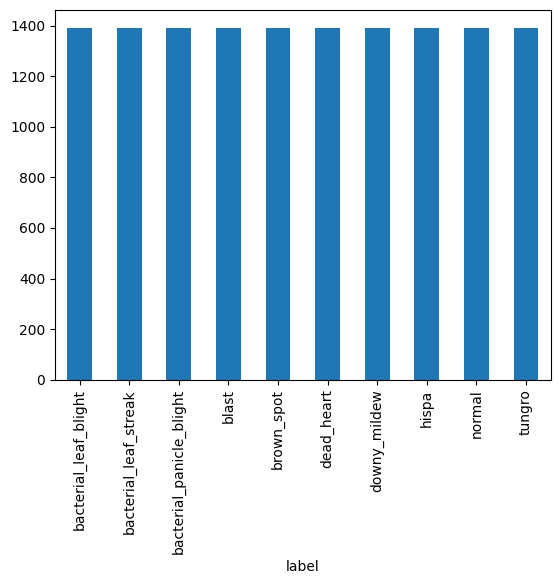

In [120]:
train_disease_df['label'].value_counts().plot(kind='bar')

In [122]:
disease_dataset = tf.data.Dataset.from_tensor_slices((train_disease_df['Image Path'], train_disease_df['label']))
disease_dataset = disease_dataset.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)

output_root = 'ML_a2_dataset/train_images'
for i, (aug_img, label) in enumerate(disease_dataset):
	arr = aug_img.numpy().astype(np.uint8)
	label = label.numpy().decode('utf-8')

	out_dir = os.path.join(output_root, label)
	os.makedirs(out_dir, exist_ok=True)

	save_path = os.path.join(out_dir, f"aug_{i:03}.jpg")
	Image.fromarray(arr).save(save_path)

2025-05-01 15:53:50.681406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [128]:
for i, row in val_disease_df.iterrows():
	img = Image.open(row['Image Path'])

	if img.size[0] > img.size[1]:
		img = img.rotate(90)

	img = img.resize((256, 256))

	out_dir = os.path.join('ML_a2_dataset/val_images', row['label'])
	os.makedirs(out_dir, exist_ok=True)
	img.save(os.path.join(out_dir, f"val_{i:03}.jpg"))